In [1]:
import pyscf

In [2]:
molecule = """
C       0.0000798737    -0.6847000736    -0.0002643968
C      -0.0000045993     0.6847004005     0.0002321528
C      -1.2516911322    -1.4911873637     0.1466932005
C      -1.2518749765     1.4910363177    -0.1467039610
C      -1.5150778730     2.5769937343     0.7098491398
H      -0.8059308844     2.8141471007     1.5059397465
C      -2.6699850148     3.3471280722     0.5587999486
C       1.2517965953     1.4910321374     0.1477677003
C      -2.1705661899     1.2231314604    -1.1785327014
C      -3.3193404030     2.0001353635    -1.3374680043
H      -1.9754906005     0.3998853275    -1.8675870556
C      -3.5780064231     3.0622619875    -0.4659687068
H      -2.8596080161     4.1773917213     1.2434429374
H      -4.4781551133     3.6690973479    -0.5886415787
H      -4.0148678676     1.7755550664    -2.1496525320
C       2.1704109553     1.2225558471     1.1795144346
C       3.3191093626     1.9995538819     1.3390478222
H       1.9753402756     0.3988681616     1.8680462995
C       3.5777686992     3.0622493132     0.4682440122
H       4.0145794989     1.7745163470     2.1511552290
C       2.6698274510     3.3476782111    -0.5564381473
H       4.4778557447     3.6690817155     0.5913856675
C       1.5150008611     2.5775426423    -0.7080856191
H       2.8594474394     4.1783896971    -1.2405391348
H       0.8059166949     2.8151487108    -1.5040995927
C      -2.1703961368    -1.2233786575     1.1785341370
C      -3.3190787816    -2.0005125952     1.3374948800
C      -3.5776357724    -3.0626765642     0.4660087159
C      -2.6695981507    -3.3474466752    -0.5587727444
H      -4.0146190413    -1.7760053156     2.1496885556
H      -4.4777125752    -3.6696145874     0.5887005281
C      -1.5147815209    -2.5771813908    -0.7098473074
H      -1.9754025981    -0.4001011916     1.8675741554
H      -0.8056200305    -2.8142567616    -1.5059480749
H      -2.8591370644    -4.1777379183    -1.2434055231
C       1.5152979685    -2.5773545959     0.7080850887
C       1.2519801238    -1.4908805520    -0.1477803173
C       2.1705789183    -1.2223084553    -1.1795164524
C       3.3193683528    -1.9991768638    -1.3390263340
H       1.9754252377    -0.3986520184    -1.8680623142
C       3.5781378814    -3.0618350390    -0.4682098260
H       4.0148243151    -1.7740665935    -2.1511258023
C       2.6702145498    -3.3473596048     0.5564610587
H       4.4782963802    -3.6685651120    -0.5913340722
H       2.8599195394    -4.1780435886     1.2405719056
H       0.8062295737    -2.8150384765     1.5040900373
"""

## SCF
First solve for the UHF solution for the 11-et state. This is chosen so that the weakest bonds in all for phenyl groups, and the ethylene unit are broken, creating a natural active space. 

In [3]:

basis = "6-31g*"

pymol = pyscf.gto.Mole(atom=molecule,
    symmetry = True, spin=2, charge=0,
    basis = basis)

pymol.build()
print("built")
print("symmetry: ",pymol.topgroup)
mf = pyscf.scf.UHF(pymol).density_fit()
mf.verbose = 4
mf.conv_tol = 1e-8
mf.conv_tol_grad = 1e-5
mf.chkfile = "cr-def2svp.fchk"
# mf.init_guess = "chkfile"
mf.run(max_cycle=20)

print(" Hartree-Fock Energy: %12.8f" % mf.e_tot)

built
symmetry:  C1


******** <class 'pyscf.df.df_jk.density_fit.<locals>.DFHF'> ********
method = DFHF-UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-05
SCF max_cycles = 20
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = cr-def2svp.fchk
max_memory 4000 MB (current use 0 MB)
number electrons alpha = 89  beta = 87
init E= -1004.18605040874
  alpha nocc = 89  HOMO = -0.0144033735657714  LUMO = 0.0269702602390633
  beta  nocc = 87  HOMO = -0.234346554291644  LUMO = -0.168288513238305

WARN: system HOMO -0.0144033735657714 >= system LUMO -0.168288513238305

cycle= 1 E= -995.778016017452  delta_E= 8.41  |g|= 0.593  |ddm|= 4.88
  alpha nocc = 89  HOMO = -0.146541850219879  LUMO = 0.0818985786905379
  beta  nocc = 87  HOMO = -0.313111489252202  LUMO = -0.0962298781710711
cycle= 2 E= -996.058902965013  delta_E= -0.281  |g|= 0.189  |dd

In [7]:
# # now try Newton
# dm1 = mf.make_rdm1()
# mf = pyscf.scf.UHF(pymol).density_fit().newton()
# mf.verbose = 4
# mf.conv_tol = 1e-8
# mf.conv_tol_grad = 1e-5
# mf.kernel(dm0=dm1)



******** <class 'pyscf.df.df_jk.density_fit.<locals>.DFHF'> Newton solver flags ********
SCF tol = 1e-08
conv_tol_grad = 1e-05
max. SCF cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /var/folders/9p/nhnq58pj3td7svw_pppk_syw0000gn/T/tmp_0tu4qm7
max_cycle_inner = 12
max_stepsize = 0.05
ah_start_tol = 1e+09
ah_level_shift = 0
ah_conv_tol = 1e-12
ah_lindep = 1e-14
ah_start_cycle = 1
ah_max_cycle = 40
ah_grad_trust_region = 2.5
kf_interval = 4
kf_trust_region = 5
canonicalization = True
max_memory 4000 MB (current use 0 MB)
  alpha nocc = 93  HOMO = -0.0763500452444308  LUMO = 0.0337188428283178
  beta  nocc = 83  HOMO = -0.158459085252421  LUMO = -0.0761805131704248

WARN: system HOMO 0.225172136409184 >= system LUMO -0.0761805131704248

Initial guess E= -995.275491298454  |g|= 0.000243679
macro= 0  E= -995.275491081872  delta_E= 2.16582e-07  |g|= 0.000243679  1 KF 5 JK
macro= 1  E= -995.275491398306  delta_E= -3.16434e-07  |g|= 0.000469923  1 KF 7 JK
m

-995.2754913669496

(89, 87)
(4.381356853122398, 4.304117495200333)
 Number of active orbitals:  26
 Number of doc    orbitals:  75


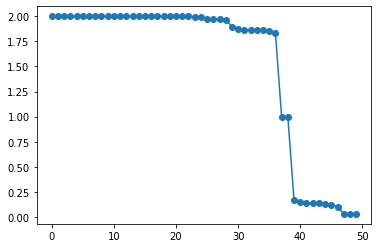

In [8]:
import numpy as np
import scipy as sp
import matplotlib as mpl
from matplotlib import pyplot as plt
from pyscf import tools
from pyscf import lo

Ca = mf.mo_coeff[0,:]
Cb = mf.mo_coeff[1,:]
S = mf.get_ovlp()
na1 = mf.nelec[0]
nb1 = mf.nelec[1]
print(mf.nelec)

Ca_doc = Ca[:,0:na1]
Cb_doc = Cb[:,0:nb1]
Pa = Ca_doc @ Ca_doc.T
Pb = Cb_doc @ Cb_doc.T

P = Pa + Pb

sqrtS = sp.linalg.sqrtm(S)
P = sqrtS @ P @ sqrtS
P = (P + P.T) * .5
# F = sp.linalg.eig(P);
P_evals, P_evecs = sp.linalg.eigh(P)

print(mf.spin_square((Ca_doc,Cb_doc),S))
act_list = []
doc_list = []

thresh = .01
for idx,n in enumerate(P_evals):
#     @printf(" %4i = %12.8f\n",idx,n)
    if n < 2.0 - thresh:
        if n > thresh:
            act_list.append(idx)
    else:
        doc_list.append(idx)
        
        
print(" Number of active orbitals: ", len(act_list))
print(" Number of doc    orbitals: ", len(doc_list))

invsqrtS = sp.linalg.inv(sqrtS)

Cact = invsqrtS @ P_evecs[:,act_list]
Cdoc = invsqrtS @ P_evecs[:,doc_list]


pyscf.tools.molden.from_mo(pymol, "C_act.molden", Cact)
pyscf.tools.molden.from_mo(pymol, "C_doc.molden", Cdoc)

plt.plot(sorted(P_evals)[::-1][50:100], marker='o')

In [9]:
Cact_loc = pyscf.lo.PM(pymol).kernel(Cact, verbose=4);

Set conv_tol_grad to 0.000316228
macro= 1  f(x)= 2.807040402399  delta_f= 2.80704  |g|= 0.954706  4 KF 20 Hx
macro= 2  f(x)= 3.7066949330735  delta_f= 0.899655  |g|= 0.541877  4 KF 21 Hx
macro= 3  f(x)= 6.1560988233047  delta_f= 2.4494  |g|= 1.04027  4 KF 20 Hx
macro= 4  f(x)= 9.9038129186192  delta_f= 3.74771  |g|= 1.49587  4 KF 20 Hx
macro= 5  f(x)= 16.027486070211  delta_f= 6.12367  |g|= 2.10549  4 KF 20 Hx
macro= 6  f(x)= 25.233926218755  delta_f= 9.20644  |g|= 1.20725  4 KF 20 Hx
macro= 7  f(x)= 25.477359208013  delta_f= 0.243433  |g|= 1.02043  2 KF 3 Hx
macro= 8  f(x)= 25.505841227339  delta_f= 0.028482  |g|= 0.334519  1 KF 2 Hx
macro= 9  f(x)= 25.505841712255  delta_f= 4.84916e-07  |g|= 0.00138163  1 KF 2 Hx
macro= 10  f(x)= 25.505841712255  delta_f= 7.10543e-15  |g|= 2.1662e-06  1 KF 1 Hx
macro X = 10  f(x)= 25.505841712255  |g|= 2.1662e-06  20 intor 29 KF 129 Hx


In [10]:
pyscf.tools.molden.from_mo(pymol, "C_act_loc.molden", Cact_loc)
# pyscf.tools.molden.from_mo(pymol, "P_act_loc.molden", Pa+Pb)

# Now build JK

In [13]:
h0 = pyscf.gto.mole.energy_nuc(pymol)
h  = pyscf.scf.hf.get_hcore(pymol)
j, k = pyscf.scf.hf.get_jk(pymol, Pa+Pb, hermi=1)

# Graph Clustering

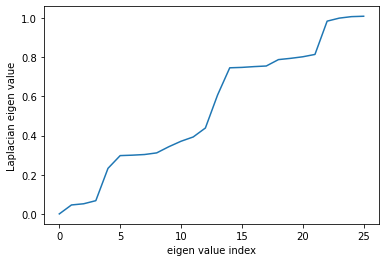

In [15]:
import copy as cp

nvecs = 5

operator = h + j - .5*k

C = cp.deepcopy(Cact_loc)
k1 = C.T @ operator @ C
A = abs(k1)
L = -1*A
for i in range(A.shape[0]):
    L[i,i] += np.sum(A[i,:])
    
L_evals, L_evecs = sp.linalg.eigh(L)
# print(L_evals)
plt.plot(L_evals,);
plt.xlabel("eigen value index");
plt.ylabel("Laplacian eigen value");

# L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
# F = eigen(L);


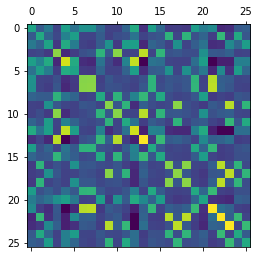

In [16]:
# projection onto the lowest `nvecs` fiedler vectors

L_evecs_ss = L_evecs[:,0:nvecs]
graph = L_evecs_ss @ L_evecs_ss.T
plt.matshow(graph);

[2 4 2 0 2 2 3 3 0 1 0 1 2 0 3 0 4 1 4 3 2 3 4 1 4 1]
[3 2 1 0 4 2 3 3 0 1 0 1 4 0 3 0 2 1 2 3 0 3 2 1 2 1]


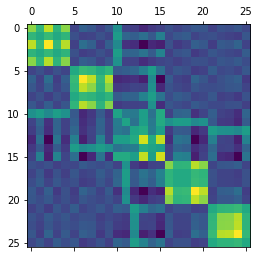

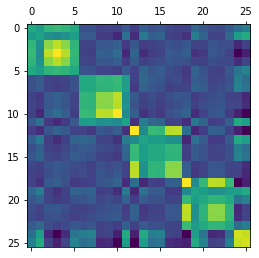

In [33]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

kmeans = KMeans(n_clusters=5, random_state=4).fit(graph)
# kmeans.labels_array([1, 1, 1, 0, 0, 0], dtype=int32)
print(kmeans.labels_)
sorted_list = np.argsort(kmeans.labels_)
plt.matshow(graph[sorted_list, :][:, sorted_list]);

clustering = AgglomerativeClustering(n_clusters=5, ).fit(graph)
print(clustering.labels_)
sorted_list = np.argsort(clustering.labels_)
plt.matshow(graph[sorted_list, :][:, sorted_list]);


In [34]:
C_sorted = Cact_loc[:,sorted_list]
pyscf.tools.molden.from_mo(pymol, "C_act_loc_sorted.molden", C_sorted)

In [37]:
# Now let's define the clusters

clusters = [
            [*range(0,6)],
            [*range(6,12)],
            [*range(12,18)],
            [*range(18,24)],
            [*range(24,26)]
           ]
init_fspace = [
    (3,3),
    (3,3),
    (3,3),
    (3,3),
    (1,1)
];
print(clusters)
print(init_fspace)

[[0, 1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11], [12, 13, 14, 15, 16, 17], [18, 19, 20, 21, 22, 23], [24, 25]]
[(3, 3), (3, 3), (3, 3), (3, 3), (1, 1)]


# Make Integrals

In [38]:
d1_embed = 2 * Cdoc @ Cdoc.T

h0 = pyscf.gto.mole.energy_nuc(pymol)
h  = pyscf.scf.hf.get_hcore(pymol)
j, k = pyscf.scf.hf.get_jk(pymol, d1_embed, hermi=1)

In [39]:
h0 += np.trace(d1_embed @ ( h + .5*j - .25*k))

h = C_sorted.T @ h @ C_sorted
j = C_sorted.T @ j @ C_sorted;
k = C_sorted.T @ k @ C_sorted;

In [41]:
nact = h.shape[0]

h2 = pyscf.ao2mo.kernel(pymol, C_sorted, aosym="s4", compact=False)
h2.shape = (nact, nact, nact, nact)

In [42]:
# The use of d1_embed only really makes sense if it has zero electrons in the
# active space. Let's warn the user if that's not true

S = pymol.intor("int1e_ovlp_sph")
n_act = np.trace(S @ d1_embed @ S @ C_sorted @ C_sorted.T)
if abs(n_act) > 1e-8 == False:
    print(n_act)
    error(" I found embedded electrons in the active space?!")

h1 = h + j - .5*k;


In [43]:
np.save("tetraphenyl-ethylene_scf_integrals_h0.npz", h0)
np.save("tetraphenyl-ethylene_scf_integrals_h1.npz", h1)
np.save("tetraphenyl-ethylene_scf_integrals_h2.npz", h2)